In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("weather_data.csv")

In [5]:
df

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2025,67,S
1,2,36.0,118.0,8.0,72,5,2,2025,72,C
2,3,12.0,149.0,12.6,74,5,3,2025,74,PS
3,4,18.0,313.0,11.5,62,5,4,2025,62,S
4,5,NaN,NaN,14.3,56,5,5,2025,56,S
...,...,...,...,...,...,...,...,...,...,...
156,155,30.0,193.0,6.9,70,9,26,2025,70,PS
157,156,NaN,145.0,13.2,77,9,27,2025,77,S
158,157,14.0,191.0,14.3,75,9,28,2025,75,S
159,158,18.0,131.0,8.0,76,9,29,2025,76,C


In [17]:
''' Step 1: Basic Data Understanding
Dataframe shape
head and tail
dtypes
describe
value counts
'''

' Step 1: Basic Data Understanding\nDataframe shape\nhead and tail\ndtypes\ndescribe\nvalue counts\n'

In [7]:
df.shape

(161, 10)

In [8]:
df.tail()

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
156,155,30.0,193.0,6.9,70,9,26,2025,70,PS
157,156,NaN,145.0,13.2,77,9,27,2025,77,S
158,157,14.0,191.0,14.3,75,9,28,2025,75,S
159,158,18.0,131.0,8.0,76,9,29,2025,76,C
160,158,18.0,131.0,8.0,76,9,29,2025,76,C


In [11]:
df.dtypes

Unnamed: 0      int64
Ozone         float64
Solar.R       float64
Wind          float64
Temp C         object
Month          object
Day             int64
Year            int64
Temp            int64
Weather        object
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  161 non-null    int64  
 1   Ozone       123 non-null    float64
 2   Solar.R     154 non-null    float64
 3   Wind        161 non-null    float64
 4   Temp C      161 non-null    object 
 5   Month       161 non-null    object 
 6   Day         161 non-null    int64  
 7   Year        161 non-null    int64  
 8   Temp        161 non-null    int64  
 9   Weather     158 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 12.7+ KB


In [13]:
df.describe()

,Unnamed: 0,Ozone,Solar.R,Wind,Day,Year,Temp
count,161.000000,123.000000,154.000000,161.000000,161.000000,161.0,161.000000
mean,80.391304,41.837398,185.642857,9.903106,15.950311,2025.0,77.739130
std,46.121738,32.674343,88.237623,3.503274,9.066285,0.0,9.397155
min,1.000000,1.000000,7.000000,1.700000,1.000000,2025.0,56.000000
25%,41.000000,18.000000,121.750000,7.400000,8.000000,2025.0,72.000000
50%,80.000000,31.000000,195.500000,9.700000,16.000000,2025.0,78.000000
75%,120.000000,62.000000,257.500000,11.500000,24.000000,2025.0,84.000000
max,158.000000,168.000000,334.000000,20.700000,31.000000,2025.0,97.000000


In [14]:
df.describe(include='object')

,Temp C,Month,Weather
count,161,161,158
unique,41,6,3
top,76,9,S
freq,11,35,59


In [16]:
df.describe(include='all')

,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
count,161.000000,123.000000,154.000000,161.000000,161,161,161.000000,161.0,161.000000,158
unique,NaN,NaN,NaN,NaN,41,6,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,76,9,NaN,NaN,NaN,S
freq,NaN,NaN,NaN,NaN,11,35,NaN,NaN,NaN,59
mean,80.391304,41.837398,185.642857,9.903106,NaN,NaN,15.950311,2025.0,77.739130,NaN
std,46.121738,32.674343,88.237623,3.503274,NaN,NaN,9.066285,0.0,9.397155,NaN
min,1.000000,1.000000,7.000000,1.700000,NaN,NaN,1.000000,2025.0,56.000000,NaN
25%,41.000000,18.000000,121.750000,7.400000,NaN,NaN,8.000000,2025.0,72.000000,NaN
50%,80.000000,31.000000,195.500000,9.700000,NaN,NaN,16.000000,2025.0,78.000000,NaN
75%,120.000000,62.000000,257.500000,11.500000,NaN,NaN,24.000000,2025.0,84.000000,NaN


In [18]:
'''
Step 2: Data Preperation
Dropping duplicate rows
Dropping irrelevant columns
Identifying duplicated columns
Renaming Columns
Handling Missing Values
Creating Date column
Outlier detection
'''

'\nStep 2: Data Preperation\nDropping duplicate rows\nDropping irrelevant columns\nIdentifying duplicated columns\nRenaming Columns\nHandling Missing Values\nCreating Date column\nOutlier detection\n'

In [19]:
df.loc[df.duplicated()]


,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
84,70,97.0,272.0,5.7,92,7,9,2025,92,C
155,154,41.0,190.0,7.4,67,5,1,2025,67,C
160,158,18.0,131.0,8.0,76,9,29,2025,76,C


In [20]:
df = df.drop_duplicates(ignore_index=True)


In [21]:
df


,Unnamed: 0,Ozone,Solar.R,Wind,Temp C,Month,Day,Year,Temp,Weather
0,1,41.0,190.0,7.4,67,5,1,2025,67,S
1,2,36.0,118.0,8.0,72,5,2,2025,72,C
2,3,12.0,149.0,12.6,74,5,3,2025,74,PS
3,4,18.0,313.0,11.5,62,5,4,2025,62,S
4,5,NaN,NaN,14.3,56,5,5,2025,56,S
...,...,...,...,...,...,...,...,...,...,...
153,154,41.0,190.0,7.4,67,5,1,2025,67,C
154,155,30.0,193.0,6.9,70,9,26,2025,70,PS
155,156,NaN,145.0,13.2,77,9,27,2025,77,S
156,157,14.0,191.0,14.3,75,9,28,2025,75,S


In [22]:
df = df.drop(["Unnamed: 0","Temp C"], axis = 1)


In [23]:
df


,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2025,67,S
1,36.0,118.0,8.0,5,2,2025,72,C
2,12.0,149.0,12.6,5,3,2025,74,PS
3,18.0,313.0,11.5,5,4,2025,62,S
4,NaN,NaN,14.3,5,5,2025,56,S
...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5,1,2025,67,C
154,30.0,193.0,6.9,9,26,2025,70,PS
155,NaN,145.0,13.2,9,27,2025,77,S
156,14.0,191.0,14.3,9,28,2025,75,S


In [24]:
df = df.rename({"Solar.R":"Solar"},axis=1)
df

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2025,67,S
1,36.0,118.0,8.0,5,2,2025,72,C
2,12.0,149.0,12.6,5,3,2025,74,PS
3,18.0,313.0,11.5,5,4,2025,62,S
4,NaN,NaN,14.3,5,5,2025,56,S
...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5,1,2025,67,C
154,30.0,193.0,6.9,9,26,2025,70,PS
155,NaN,145.0,13.2,9,27,2025,77,S
156,14.0,191.0,14.3,9,28,2025,75,S


In [27]:
df.isnull().sum()


Ozone      38
Solar       7
Wind        0
Month       0
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

In [28]:

mean = df["Solar"].mean().round()
mean

185.0

In [29]:
df["Solar"] = df["Solar"].fillna(mean)


In [30]:
df


,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2025,67,S
1,36.0,118.0,8.0,5,2,2025,72,C
2,12.0,149.0,12.6,5,3,2025,74,PS
3,18.0,313.0,11.5,5,4,2025,62,S
4,NaN,185.0,14.3,5,5,2025,56,S
...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5,1,2025,67,C
154,30.0,193.0,6.9,9,26,2025,70,PS
155,NaN,145.0,13.2,9,27,2025,77,S
156,14.0,191.0,14.3,9,28,2025,75,S


In [31]:
df["Month"].unique()


array(['5', 'May', '6', '7', '8', '9'], dtype=object)

In [32]:
df["Month"].replace({"May":'5'}).unique()


array(['5', '6', '7', '8', '9'], dtype=object)

In [33]:

df["Month"] = df["Month"].replace({"May":'5'})
df

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2025,67,S
1,36.0,118.0,8.0,5,2,2025,72,C
2,12.0,149.0,12.6,5,3,2025,74,PS
3,18.0,313.0,11.5,5,4,2025,62,S
4,NaN,185.0,14.3,5,5,2025,56,S
...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5,1,2025,67,C
154,30.0,193.0,6.9,9,26,2025,70,PS
155,NaN,145.0,13.2,9,27,2025,77,S
156,14.0,191.0,14.3,9,28,2025,75,S


In [34]:
df["Date"] = pd.to_datetime(df[["Year", "Month", "Day"]])


In [35]:
df


,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather,Date
0,41.0,190.0,7.4,5,1,2025,67,S,2025-05-01
1,36.0,118.0,8.0,5,2,2025,72,C,2025-05-02
2,12.0,149.0,12.6,5,3,2025,74,PS,2025-05-03
3,18.0,313.0,11.5,5,4,2025,62,S,2025-05-04
4,NaN,185.0,14.3,5,5,2025,56,S,2025-05-05
...,...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5,1,2025,67,C,2025-05-01
154,30.0,193.0,6.9,9,26,2025,70,PS,2025-09-26
155,NaN,145.0,13.2,9,27,2025,77,S,2025-09-27
156,14.0,191.0,14.3,9,28,2025,75,S,2025-09-28


<Axes: >

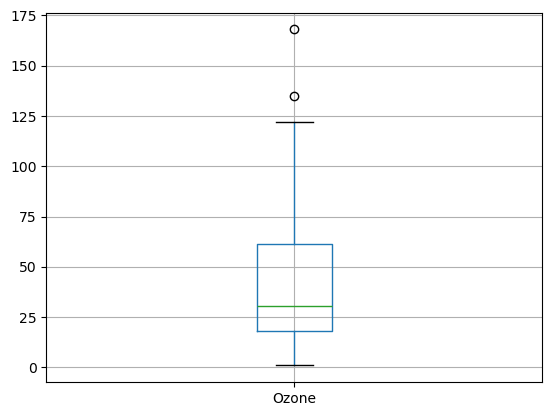

In [36]:
df.boxplot(column="Ozone")


In [37]:
df["Ozone"].describe()


count    120.000000
mean      41.583333
std       32.620709
min        1.000000
25%       18.000000
50%       30.500000
75%       61.500000
max      168.000000
Name: Ozone, dtype: float64

In [38]:
IQR = 61.500000 - 18.000000
max_limit = 61.500000 + 1.5 * IQR
max_limit

126.75

In [39]:
df[df["Ozone"]>max_limit]


,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather,Date
61,135.0,269.0,4.1,7,1,2025,84,S,2025-07-01
116,168.0,238.0,3.4,8,25,2025,81,PS,2025-08-25


In [40]:
'''

Step 3: Univariate Analysis (Feature Understanding )
Analyzing Categorical Features
Value Counts, Bar Charts
Analyzing Numerical Features
Mean, Median, Mode, Variance, Skewness, Kurtosis
Histograms, Boxplots, Violin Plots
Feature Distributions
KDE Plots
Distribution Plots (Seaborn, Plotly)

'''

'\n\nStep 3: Univariate Analysis (Feature Understanding )\nAnalyzing Categorical Features\nValue Counts, Bar Charts\nAnalyzing Numerical Features\nMean, Median, Mode, Variance, Skewness, Kurtosis\nHistograms, Boxplots, Violin Plots\nFeature Distributions\nKDE Plots\nDistribution Plots (Seaborn, Plotly)\n\n'

In [41]:
df.dtypes


Ozone             float64
Solar             float64
Wind              float64
Month              object
Day                 int64
Year                int64
Temp                int64
Weather            object
Date       datetime64[ns]
dtype: object

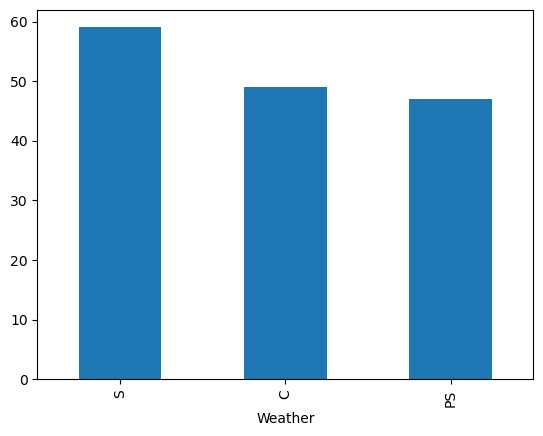

In [42]:
df["Weather"].value_counts().plot(kind='bar')
plt.show()

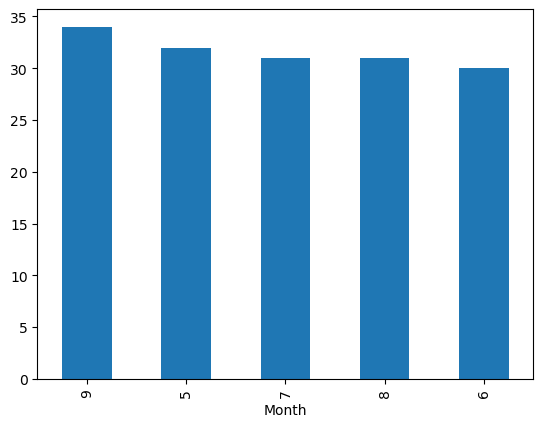

In [43]:
df["Month"].value_counts().plot(kind='bar')
plt.show()

In [44]:
#Mean, Median, Mode, Variance, Skewness, Kurtosis


In [45]:
df.describe()


,Ozone,Solar,Wind,Day,Year,Temp,Date
count,120.000000,158.000000,158.000000,158.000000,158.0,158.000000,158
mean,41.583333,185.386076,9.957595,16.006329,2025.0,77.727848,2025-07-17 09:06:50.126582272
min,1.000000,7.000000,1.700000,1.000000,2025.0,56.000000,2025-05-01 00:00:00
25%,18.000000,127.000000,7.400000,8.000000,2025.0,72.000000,2025-06-08 06:00:00
50%,30.500000,192.500000,9.700000,16.000000,2025.0,78.500000,2025-07-17 12:00:00
75%,61.500000,255.000000,11.875000,24.000000,2025.0,84.000000,2025-08-25 18:00:00
max,168.000000,334.000000,20.700000,31.000000,2025.0,97.000000,2025-09-30 00:00:00
std,32.620709,86.722687,3.511261,8.997166,0.0,9.377877,NaN


In [46]:

df.var(numeric_only=True)


Ozone    1064.110644
Solar    7520.824518
Wind       12.328955
Day        80.949004
Year        0.000000
Temp       87.944570
dtype: float64

In [47]:
df.skew(numeric_only=True)


Ozone    1.282000
Solar   -0.425459
Wind     0.349332
Day     -0.036407
Year     0.000000
Temp    -0.340108
dtype: float64

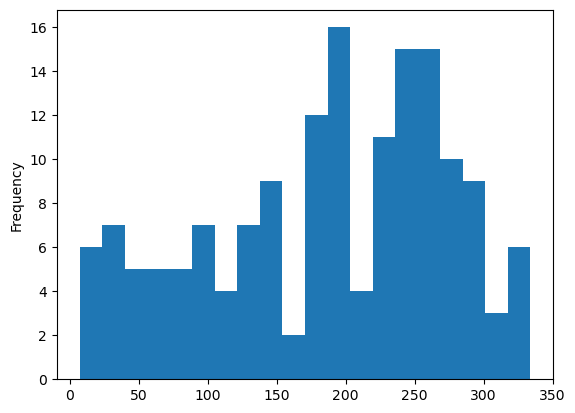

In [48]:
df["Solar"].plot(kind='hist', bins=20)
plt.show()

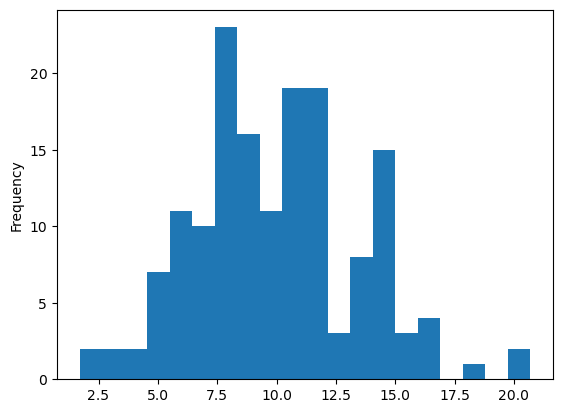

In [49]:

df["Wind"].plot(kind='hist', bins=20)
plt.show()

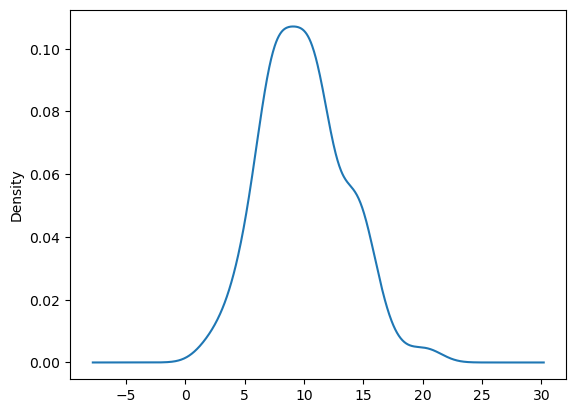

In [50]:
df["Wind"].plot(kind='kde')
plt.show()

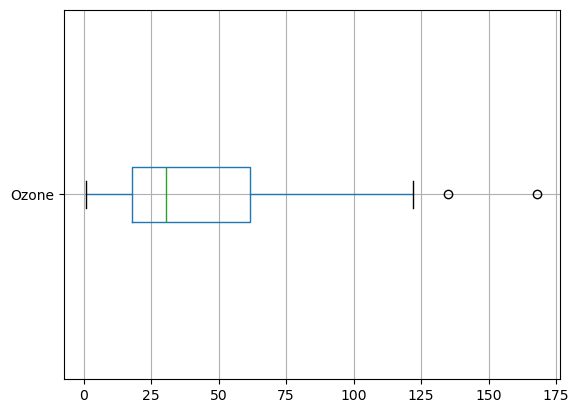

In [51]:
df.boxplot(column="Ozone", vert=False)
plt.show()


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


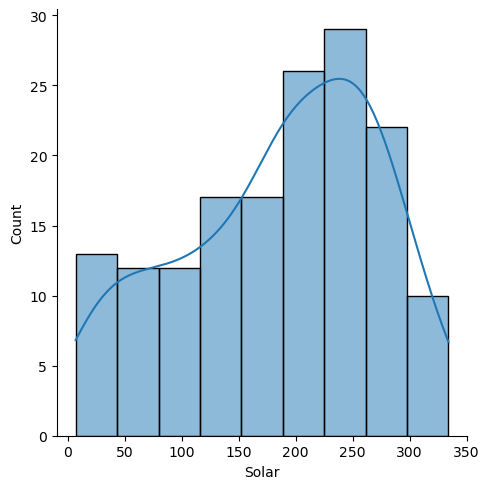

In [52]:
sns.displot(data=df, x='Solar', kind='hist', kde=True)
plt.show()

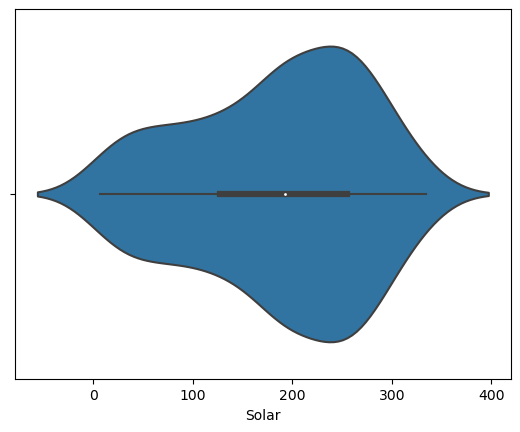

In [53]:
sns.violinplot(data=df, x="Solar")
plt.show()

In [54]:
'''
Step 4: Bivariate and Multivariate Analysis (Feature Relationships)
Numerical vs Numerical
Scatterplots, Correlation Matrix (heatmap), Pairplots
Categorical vs Numerical
Boxplots, Violin Plots, Barplots
Categorical vs Categorical
Crosstabs
Date vs Numerical
Grouped Statistics with .groupby()

'''

'\nStep 4: Bivariate and Multivariate Analysis (Feature Relationships)\nNumerical vs Numerical\nScatterplots, Correlation Matrix (heatmap), Pairplots\nCategorical vs Numerical\nBoxplots, Violin Plots, Barplots\nCategorical vs Categorical\nCrosstabs\nDate vs Numerical\nGrouped Statistics with .groupby()\n\n'

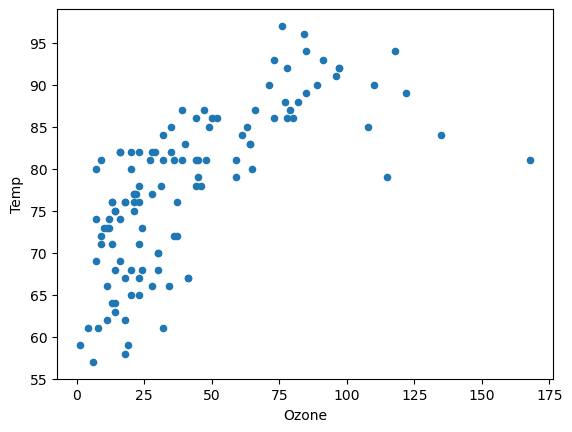

In [55]:

df.plot(kind="scatter", x="Ozone", y="Temp")
plt.show()

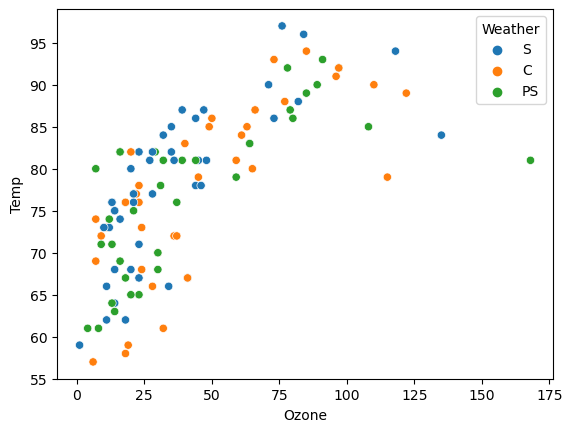

In [56]:
sns.scatterplot(data=df, x="Ozone", y="Temp", hue="Weather")
plt.show()

In [57]:

df1 = df.drop(["Year"], axis=1)
df1

,Ozone,Solar,Wind,Month,Day,Temp,Weather,Date
0,41.0,190.0,7.4,5,1,67,S,2025-05-01
1,36.0,118.0,8.0,5,2,72,C,2025-05-02
2,12.0,149.0,12.6,5,3,74,PS,2025-05-03
3,18.0,313.0,11.5,5,4,62,S,2025-05-04
4,NaN,185.0,14.3,5,5,56,S,2025-05-05
...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5,1,67,C,2025-05-01
154,30.0,193.0,6.9,9,26,70,PS,2025-09-26
155,NaN,145.0,13.2,9,27,77,S,2025-09-27
156,14.0,191.0,14.3,9,28,75,S,2025-09-28


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

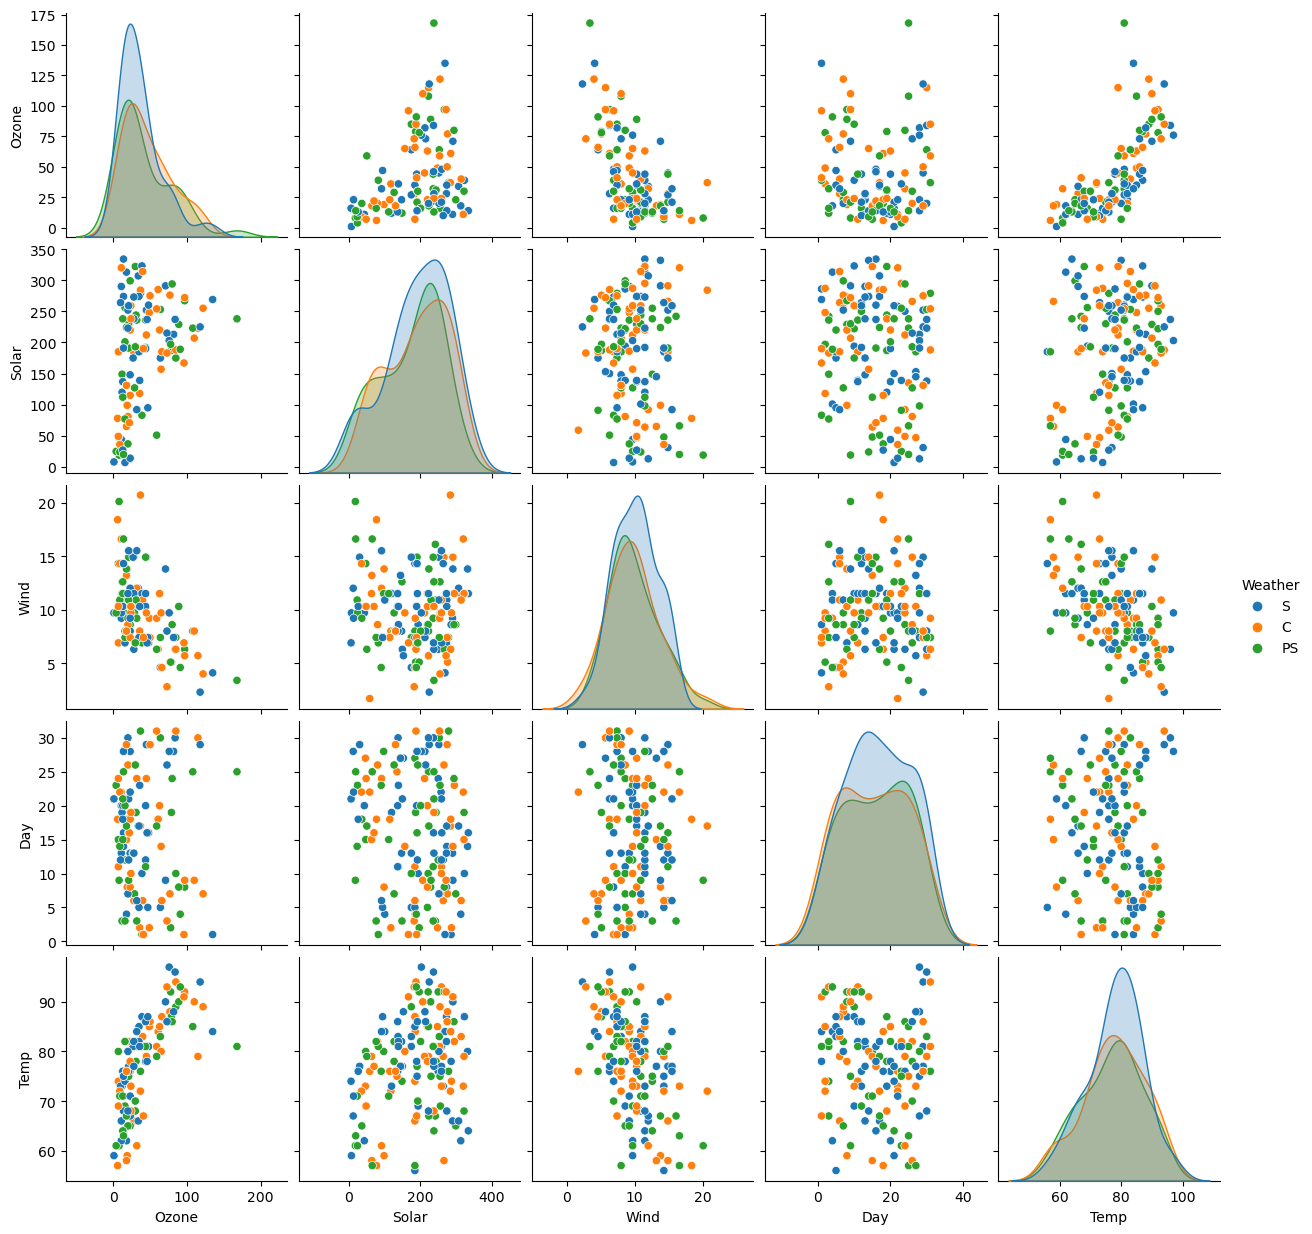

In [58]:
sns.pairplot(data=df1, hue="Weather")
plt.show()

In [59]:
df1.corr(numeric_only=True)


,Ozone,Solar,Wind,Day,Temp
Ozone,1.000000,0.344013,-0.593530,-0.035055,0.694098
Solar,0.344013,1.000000,-0.055036,-0.149447,0.260577
Wind,-0.593530,-0.055036,1.000000,0.040151,-0.441247
Day,-0.035055,-0.149447,0.040151,1.000000,-0.124538
Temp,0.694098,0.260577,-0.441247,-0.124538,1.000000


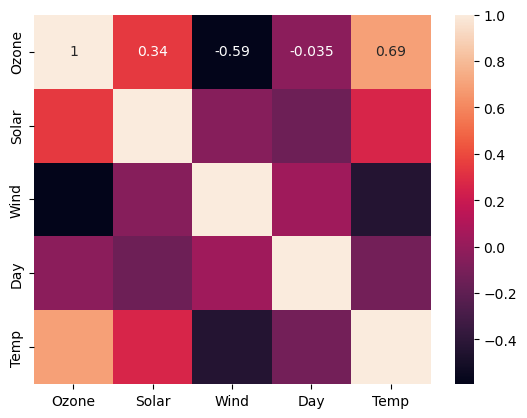

In [60]:
sns.heatmap(df1.corr(numeric_only=True), annot=True)
plt.show()

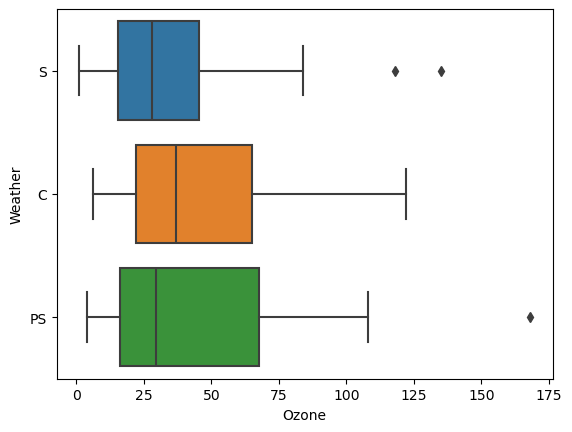

In [61]:
sns.boxplot(data = df, x = "Ozone", y = "Weather")
plt.show()

In [62]:
df


,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather,Date
0,41.0,190.0,7.4,5,1,2025,67,S,2025-05-01
1,36.0,118.0,8.0,5,2,2025,72,C,2025-05-02
2,12.0,149.0,12.6,5,3,2025,74,PS,2025-05-03
3,18.0,313.0,11.5,5,4,2025,62,S,2025-05-04
4,NaN,185.0,14.3,5,5,2025,56,S,2025-05-05
...,...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5,1,2025,67,C,2025-05-01
154,30.0,193.0,6.9,9,26,2025,70,PS,2025-09-26
155,NaN,145.0,13.2,9,27,2025,77,S,2025-09-27
156,14.0,191.0,14.3,9,28,2025,75,S,2025-09-28


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


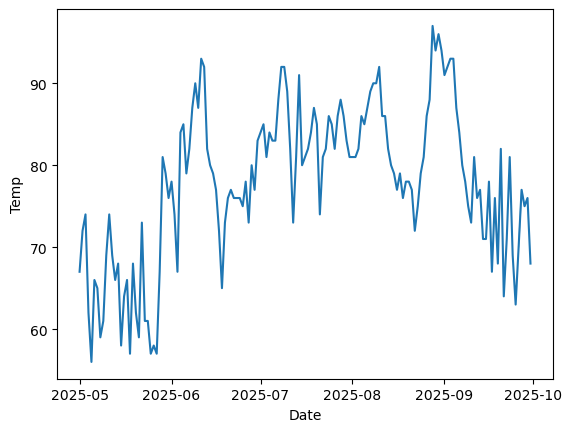

In [63]:

sns.lineplot(data=df, x="Date", y="Temp")
plt.show()

In [64]:
pd.crosstab(df["Month"], df["Weather"])


Weather,C,PS,S
Month,,,
5,11,9,12
6,9,9,12
7,11,8,11
8,10,8,11
9,8,13,13


In [65]:
df.groupby("Weather").mean(numeric_only=True)


,Ozone,Solar,Wind,Day,Year,Temp
Weather,,,,,,
C,46.162162,191.938776,9.783673,15.489796,2025.0,77.734694
PS,42.194444,174.574468,9.908511,16.042553,2025.0,76.872340
S,36.909091,193.050847,10.093220,16.661017,2025.0,78.067797


In [66]:
df.groupby("Weather")[["Ozone", "Wind"]].describe()


Ozone                                                       Wind  \
        count       mean        std  min   25%   50%    75%    max count   
Weather                                                                    
C        37.0  46.162162  32.593041  6.0  22.0  37.0  65.00  122.0  49.0   
PS       36.0  42.194444  37.225045  4.0  16.0  29.5  67.50  168.0  47.0   
S        44.0  36.909091  28.789386  1.0  15.5  28.0  45.25  135.0  59.0   

                                                           
              mean       std  min  25%   50%    75%   max  
Weather                                                    
C         9.783673  3.869450  1.7  7.4   9.7  11.50  20.7  
PS        9.908511  3.612348  3.4  7.4   9.2  12.05  20.1  
S        10.093220  3.177880  2.3  7.4  10.3  11.75  15.5

In [67]:
#What are average values of numerical features for Sunny Weather?

df[df["Ozone"]>41.0].sort_values(by="Temp", ascending=False)

,Ozone,Solar,Wind,Month,Day,Year,Temp,Weather,Date
119,76.0,203.0,9.7,8,28,2025,97,S,2025-08-28
121,84.0,237.0,6.3,8,30,2025,96,S,2025-08-30
120,118.0,225.0,2.3,8,29,2025,94,S,2025-08-29
122,85.0,188.0,6.3,8,31,2025,94,C,2025-08-31
125,73.0,183.0,2.8,9,3,2025,93,C,2025-09-03
126,91.0,189.0,4.6,9,4,2025,93,PS,2025-09-04
124,78.0,197.0,5.1,9,2,2025,92,PS,2025-09-02
68,97.0,267.0,6.3,7,8,2025,92,PS,2025-07-08
69,97.0,272.0,5.7,7,9,2025,92,C,2025-07-09
123,96.0,167.0,6.9,9,1,2025,91,C,2025-09-01


In [68]:

# What are average values of numerical features for Sunny Weather?
df[df["Weather"] =='S'].mean(numeric_only=True)

Ozone      36.909091
Solar     193.050847
Wind       10.093220
Day        16.661017
Year     2025.000000
Temp       78.067797
dtype: float64

In [69]:
# What is the average temperature during the month of June when the weather is cloudy?
df[(df["Month"]=='6')&(df["Weather"]=="C")]["Temp"].mean().round()

78.0